In [100]:
import numpy as np
import matplotlib.pyplot as plt

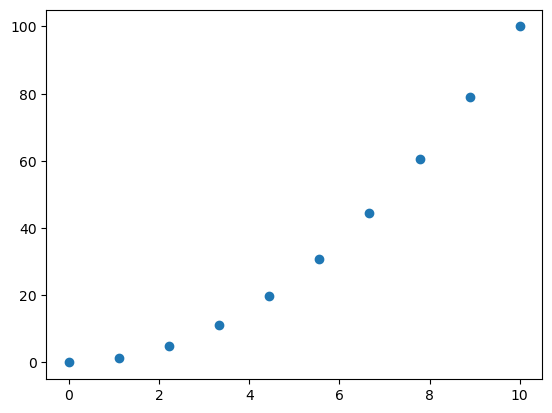

In [101]:
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [102]:
from scipy.interpolate import interp1d

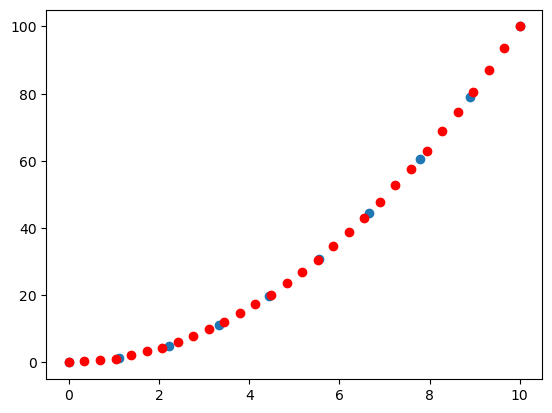

In [103]:
f = interp1d(x,y, kind='linear')
new_x = np.linspace(0,10,30)
result = f(new_x)
plt.scatter(x, y)
plt.scatter(new_x, result,c='r')

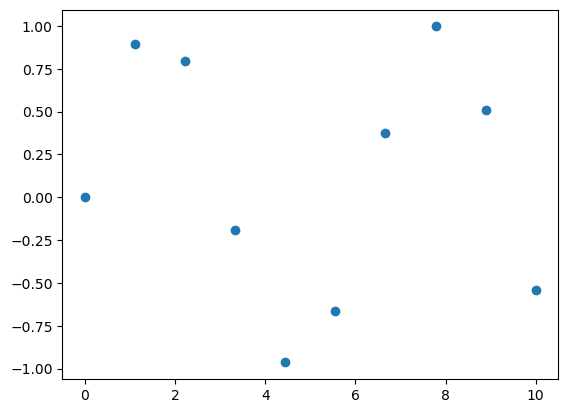

In [104]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

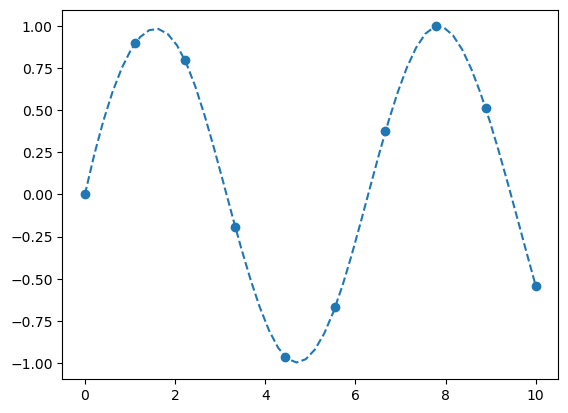

In [105]:
# création de la fonction interpolation f
f = interp1d(x, y, kind='cubic')

# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 50)
result = f(new_x)

# visualisation avec matplotlib
plt.scatter(x, y)
plt.plot(new_x, result, linestyle = 'dashed')

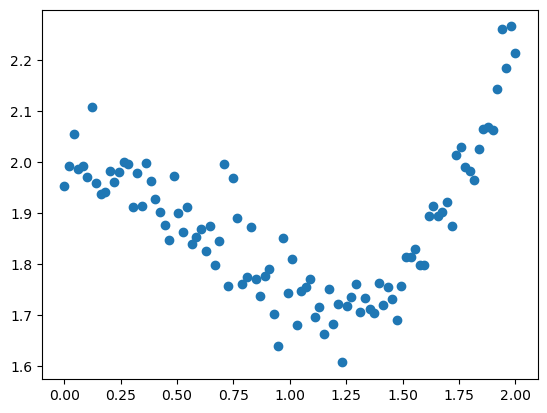

In [113]:
# curve_fit
# Création d'un Dataset avec du bruit "normal"
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [114]:
def f (x,a,b,c,d):
    return a * x**3 + b * x**2 + c * x + d

In [119]:
from scipy import optimize

In [120]:
params, param_cov = optimize.curve_fit(f,x,y)

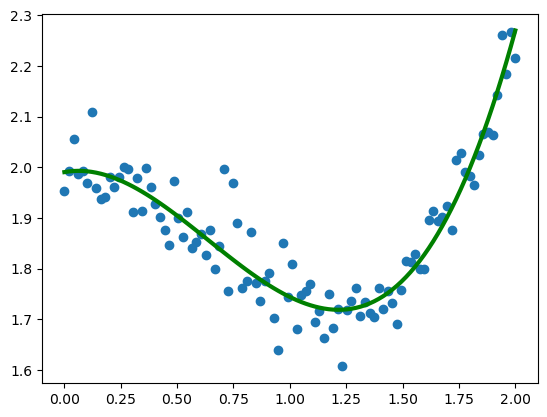

In [121]:
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]), c='g', lw=3)

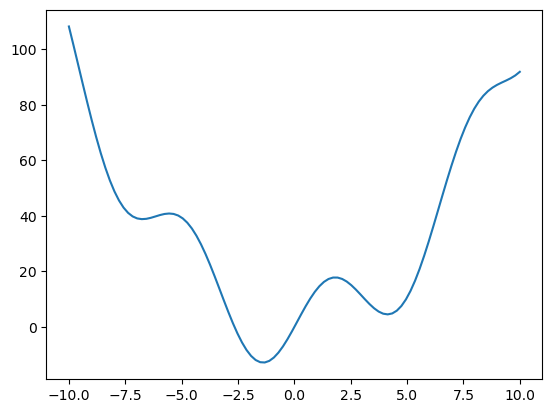

In [125]:
# Minimisation 1D

# Définition d'une fonction a 1 Dimension
def f (x):
    return x**2 + 15*np.sin(x)

# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [128]:
result = optimize.minimize(f,x0=-5).x

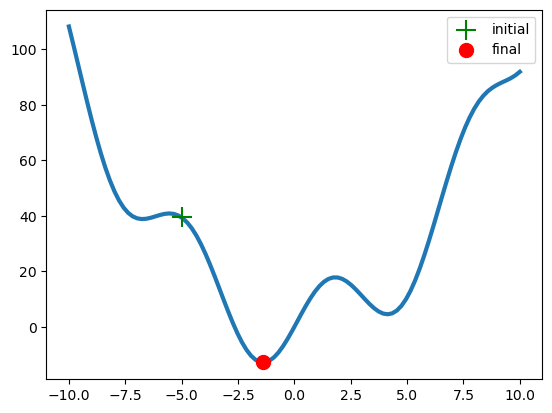

In [130]:
# Visualisation du résultat
x0=-5
plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()


In [134]:
# Minimisation 2D

# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

[-0.78539918 -2.3561934 ]


C:\Users\mtx\AppData\Local\Temp\ipykernel_42376\737482443.py:12: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(f,x0=x0).x


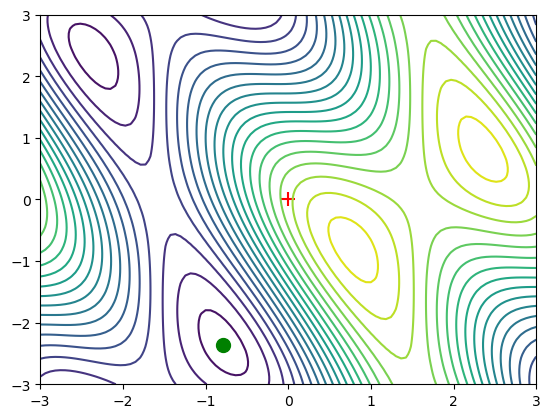

In [148]:
# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

x0= np.zeros((2,1))
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ

result = optimize.minimize(f,x0=x0).x
plt.scatter(result[0],result[1],c='g',s=100)
print(result)

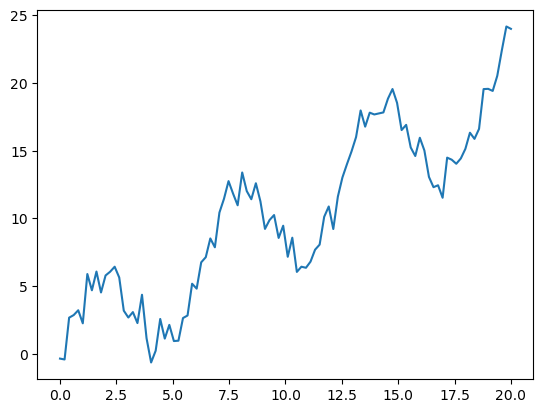

In [151]:
# Traitement de signal

# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

In [152]:
from scipy import signal

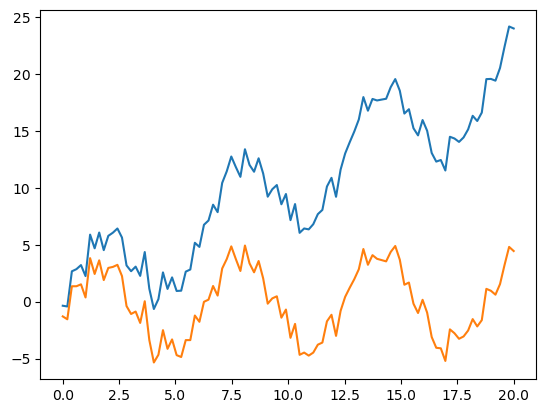

In [156]:
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)

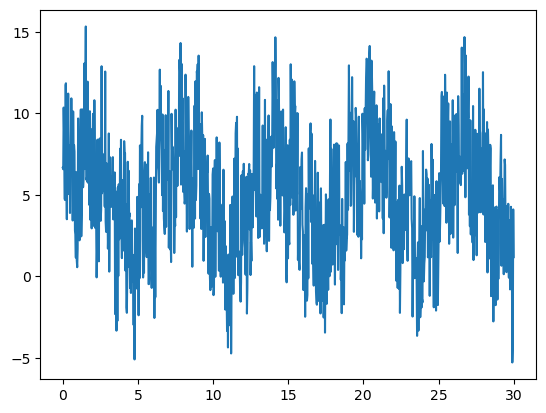

In [161]:
# Transformation de Fourier

# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

In [162]:
from scipy import fftpack

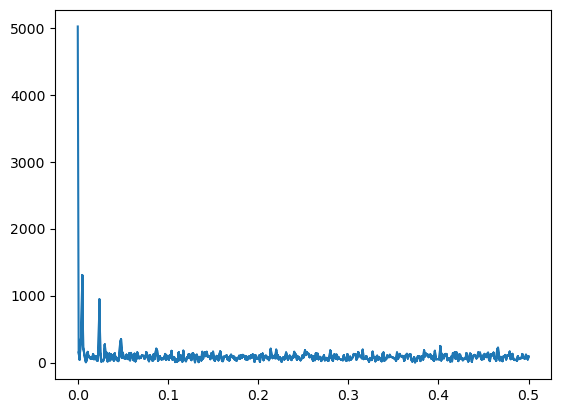

In [170]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [171]:
fourier[power<400] = 0

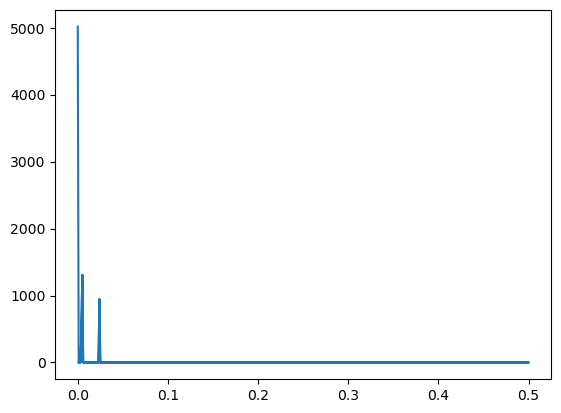

In [172]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [174]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

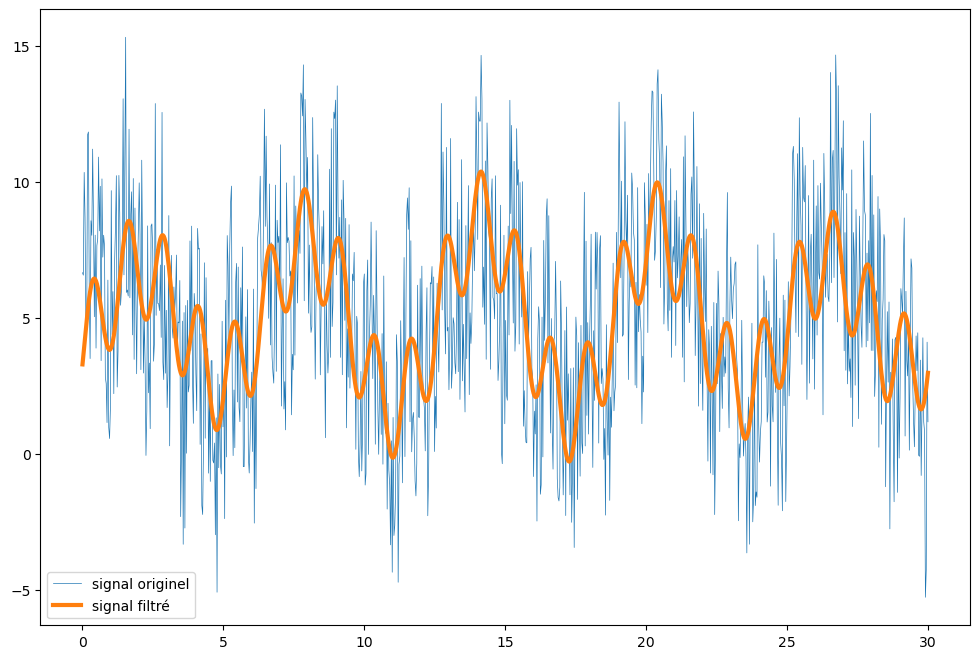

In [175]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

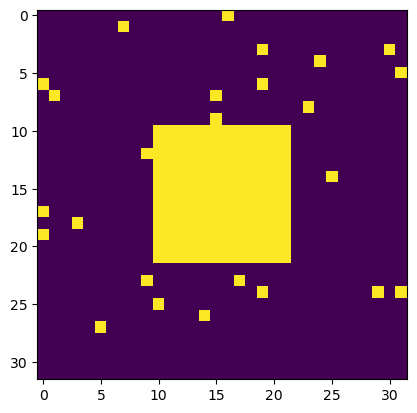

In [191]:
# Image processing
from scipy import ndimage

# Création d'une image avec quelques artefacts
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(X)

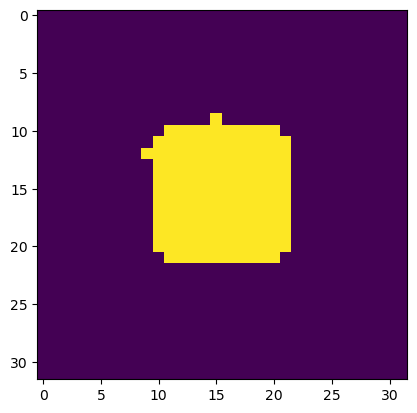

In [192]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

(545, 617)

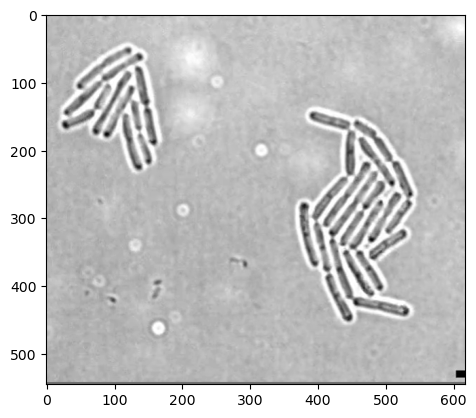

In [241]:
# Application : Image processing (cas réel)

# importer l'image avec pyplot
image = plt.imread('bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

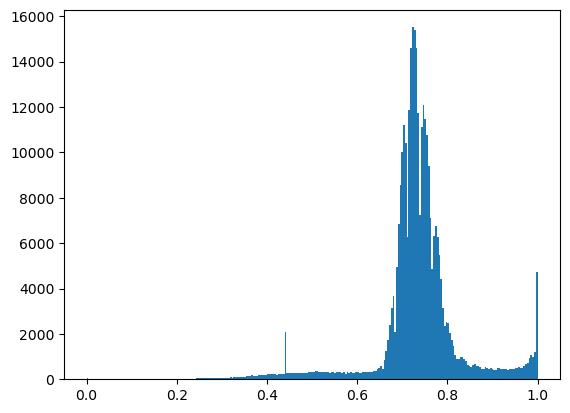

In [242]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(),bins=255)
plt.show()

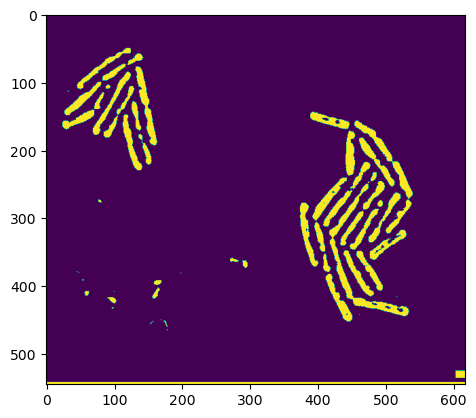

In [243]:
image = image<0.612
plt.imshow(image)

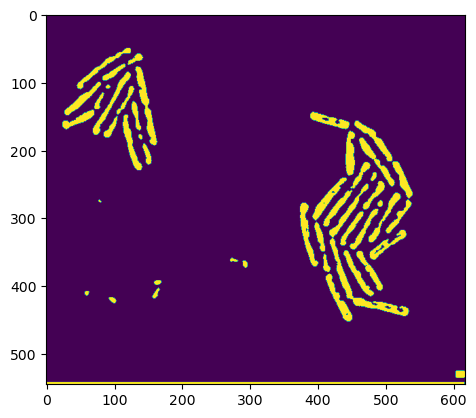

In [244]:
open_X = ndimage.binary_opening(image)
plt.imshow(open_X)

In [245]:
label_image, n_labels = ndimage.label(open_X)
print(n_labels)

47


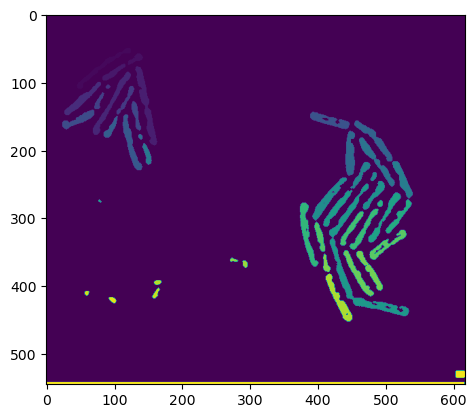

In [246]:
plt.imshow(label_image)

In [250]:
sizes = ndimage.sum(open_X, label_image, range(n_labels))
sizes

array([   0.,  640.,  176.,  286., 1102.,  774.,  605.,   32.,  258.,
        151.,  281.,  488.,  628.,  735.,  244.,  717.,  708.,   37.,
        713.,  215.,  569.,  322.,   77.,  743.,  388., 2303.,  518.,
        607.,   13.,  418.,   61.,  865.,  513.,  423.,  335.,  608.,
        647.,  548.,  166.,   46.,   63.,  757.,   62.,   83.,   36.,
         68.,  150.])

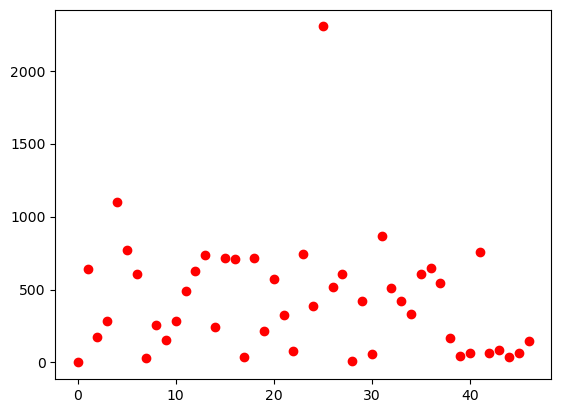

In [251]:
plt.scatter(range(n_labels),sizes,c='red')